[View in Colaboratory](https://colab.research.google.com/github/bell-one/tf_colab/blob/master/MNIST_withDNN_tf_2.ipynb)

In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import random

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
keep_prob = tf.placeholder(tf.float32)
nb_classes = 10 # 0~9

X = tf.placeholder(tf.float32, [None, 28*28])
Y = tf.placeholder(tf.float32, [None, nb_classes])

W1 = tf.get_variable("W1", shape=[784, 512],initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([512]))
layer1 = tf.nn.relu(tf.matmul(X,W1)+b1)
layer1 = tf.nn.dropout(layer1, keep_prob=keep_prob)

W2 = tf.get_variable("W2", shape=[512, 512],initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([512]))
m2 = tf.matmul(layer1,W2)+b2
layer1 = tf.nn.dropout(layer1, keep_prob=keep_prob)

W2_2 = tf.get_variable("W2_2", shape=[512, 512],initializer=tf.contrib.layers.xavier_initializer())
b2_2 = tf.Variable(tf.random_normal([512]))
m2_2 = tf.matmul(layer1,W2_2)+b2_2
logit2=m2+m2_2

layer2 = tf.nn.relu(logit2)

W3 = tf.get_variable("W3", shape=[512, 512],initializer=tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([512]))
layer3 = tf.nn.relu(tf.matmul(layer2,W3)+b3)
layer3 = tf.nn.dropout(layer3, keep_prob=keep_prob)
  
W4 = tf.get_variable("W4", shape=[512, 512],initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([512]))
layer4 = tf.nn.relu(tf.matmul(layer3,W4)+b4)
  
W5 = tf.get_variable("W5", shape=[512, 512],initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([512]))
layer5 = tf.nn.relu(tf.matmul(layer4,W5)+b5)
layer5 = tf.nn.dropout(layer5, keep_prob=keep_prob)

W6 = tf.get_variable("W6", shape=[512, 10],initializer=tf.contrib.layers.xavier_initializer())
b6 = tf.Variable(tf.random_normal([nb_classes]))
hypo = tf.matmul(layer5,W6)+b6

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypo, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

In [0]:
# test model, accuracy
is_correct = tf.equal(tf.argmax(hypo, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

Epoch: 0001 cost =  0.475472332
Accuracy:  0.9529
Label: [2]
Prediction: [2]


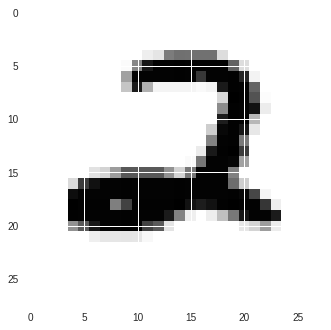

Epoch: 0002 cost =  0.173123625
Accuracy:  0.9663
Label: [1]
Prediction: [1]


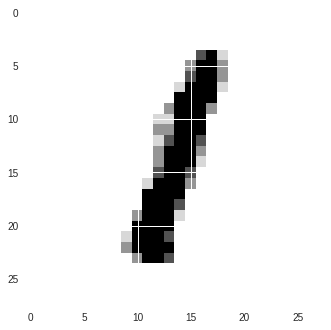

Epoch: 0003 cost =  0.128899593
Accuracy:  0.9714
Label: [8]
Prediction: [8]


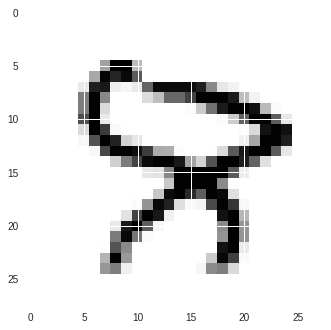

Epoch: 0004 cost =  0.111966311
Accuracy:  0.9729
Label: [4]
Prediction: [4]


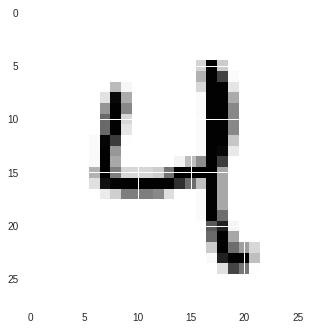

Epoch: 0005 cost =  0.097111126
Accuracy:  0.9774
Label: [5]
Prediction: [5]


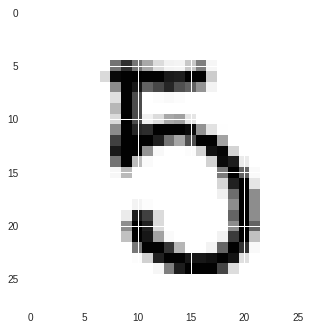

Epoch: 0006 cost =  0.091432700
Accuracy:  0.9747
Label: [9]
Prediction: [9]


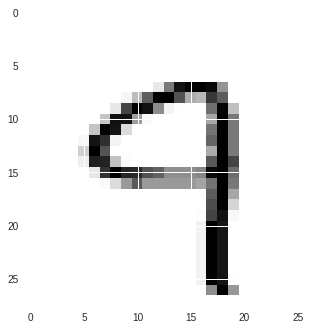

Epoch: 0007 cost =  0.079276350
Accuracy:  0.9801
Label: [2]
Prediction: [2]


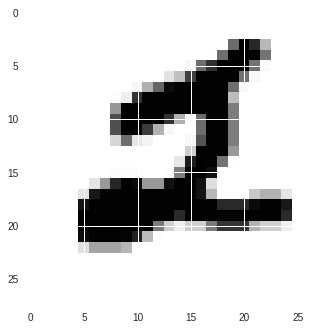

Epoch: 0008 cost =  0.072904747
Accuracy:  0.9794
Label: [1]
Prediction: [1]


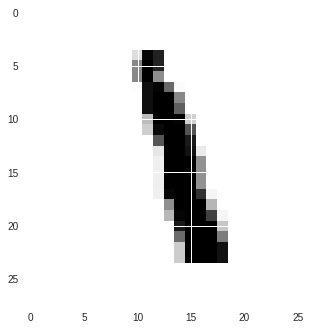

Epoch: 0009 cost =  0.069323636
Accuracy:  0.9802
Label: [2]
Prediction: [2]


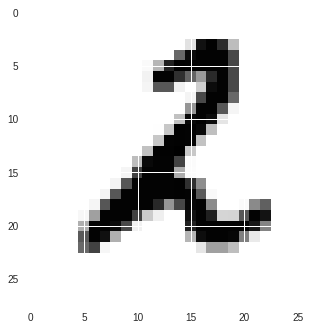

Epoch: 0010 cost =  0.061629834
Accuracy:  0.9797
Label: [4]
Prediction: [4]


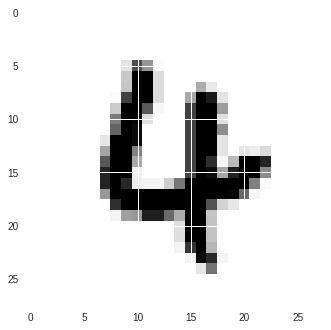

Epoch: 0011 cost =  0.057756258
Accuracy:  0.9787
Label: [2]
Prediction: [2]


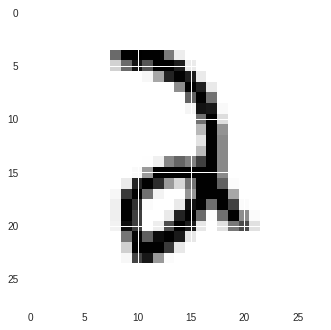

Epoch: 0012 cost =  0.057216043
Accuracy:  0.9798
Label: [2]
Prediction: [2]


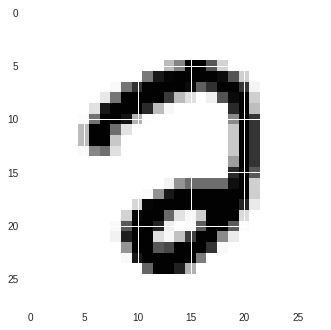

Epoch: 0013 cost =  0.054969042
Accuracy:  0.9816
Label: [5]
Prediction: [5]


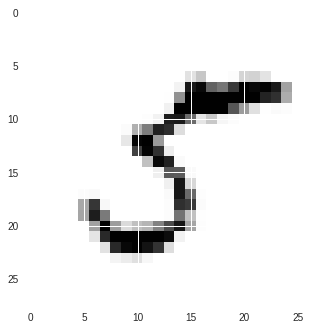

Epoch: 0014 cost =  0.049424863
Accuracy:  0.9836
Label: [2]
Prediction: [2]


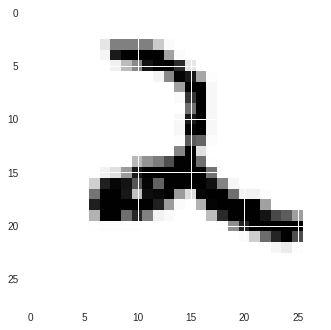

Epoch: 0015 cost =  0.050886500
Accuracy:  0.9816
Label: [0]
Prediction: [0]


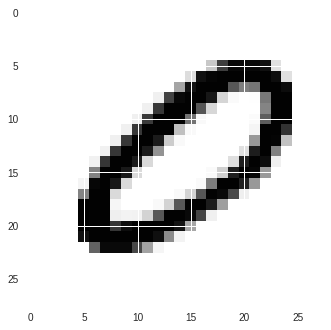

In [5]:
# graph params, launch graph
training_epochs = 15
batch_size = 100

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys, keep_prob : 0.7})
      avg_cost += c / total_batch
    print('Epoch:', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
    r = random.randint(0, mnist.test.num_examples-1)
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y : mnist.test.labels,  keep_prob : 1}))
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
    print("Prediction:", sess.run(tf.argmax(hypo, 1), feed_dict={X: mnist.test.images[r:r+1], keep_prob : 1}))
    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()